## Preprocess Data

### Outliers Subjects: [715, 999, 1009, 1011, 1085, 1190]

In [ ]:
# get a dataframe for each one

import pandas as pd
import numpy as np



def preprocess(csv1, csv2):

  df_1 = pd.read_csv(csv1)

  df_toGetMerged = pd.read_csv(csv2)


  # rename both columns to subject_id instead of participant
  df_toGetMerged = df_toGetMerged.rename(columns = {"Participant ID  {participantNumber}_{studyID}    Study ID: 300    Subject Number Ranges:  UDelaware: 001-099  Mayo Clinic: 100-199   CS Fresno: 200-299   USC: 335-399  CHLA: 400-499  JHU: 500-599  UTSWMC: 600-699  NMD: 700-799  HSS: 800-899": "subject_id",
                                                    "Dominant LEG": "dominant_leg"}) # Rename 'Dominant LEG'

  # Convert 'subject_id' columns to string type for merging
  df_1['subject_id'] = df_1['subject_id'].astype(str)
  df_toGetMerged['subject_id'] = df_toGetMerged['subject_id'].astype(str)


  # starting on row 100 until row 220,
  # take the current subject_id, if "_" is in it, split on "_", make the label the 0th index element (0 based index)
  for index in range(100, 221):
      subject_id = df_toGetMerged.loc[index, 'subject_id']
      if isinstance(subject_id, str) and "_" in subject_id:
          df_toGetMerged.loc[index, 'subject_id'] = subject_id.split("_")[0]

  # on same subject ID, I want to combine the rows from the two dataframes into a new one

  merged_df = pd.merge(df_1, df_toGetMerged, on='subject_id', how='left')

  # merged_df.to_csv("All_merged_data_300", index = False )


  controls = merged_df['subject_id'].astype(str).str.startswith('7') | (merged_df['subject_id'].astype(str).astype(int) >= 900)

  # Create the two dataframes
  df_controls = merged_df[controls].copy()

  df_controls = df_controls[(df_controls['force_symmetry'].notna()) & (df_controls['force_symmetry'] != 0)]

  # Filter for 'force_symmetry' values greater than -20 -> outliers

  df_controls_filtered = df_controls[df_controls['force_symmetry'] > -20].copy()

  df_controls_filtered = df_controls_filtered[df_controls_filtered['left_force'] != 0]
  df_controls_filtered = df_controls_filtered[df_controls_filtered['right_force'] != 0]



  ### Create dominant symmetry values ###


  df_controls_filtered['dominance_symmetry'] = np.where(
      df_controls_filtered['dominant_leg'] == 1,
      np.where(df_controls_filtered['right_force'] != 0,
              (df_controls_filtered['right_force'] - df_controls_filtered['left_force']) / df_controls_filtered['right_force'],
              np.nan),
      np.where(df_controls_filtered['left_force'] != 0,
              (df_controls_filtered['left_force'] - df_controls_filtered['right_force']) / df_controls_filtered['left_force'],
              np.nan)
  )

### Non dominant ###
  df_controls_filtered['nondominance_symmetry'] = np.where(
      df_controls_filtered['dominant_leg'] == 1,
      np.where(df_controls_filtered['left_force'] != 0,
              (df_controls_filtered['left_force'] - df_controls_filtered['right_force']) / df_controls_filtered['left_force'],
              np.nan),
          np.where(df_controls_filtered['right_force'] != 0,
              (df_controls_filtered['right_force'] - df_controls_filtered['left_force']) / df_controls_filtered['right_force'],
              np.nan),
  )



  df_controls_filtered['right_symmetry'] = np.where(df_controls_filtered['right_force'] != 0,
              (df_controls_filtered['right_force'] - df_controls_filtered['left_force']) / df_controls_filtered['right_force'],
              np.nan)



  df_controls_filtered['left_symmetry'] =  np.where(df_controls_filtered['right_force'] != 0,
              (df_controls_filtered['left_force'] - df_controls_filtered['right_force']) / df_controls_filtered['left_force'],
              np.nan)

  ### Convert into Percents ###
  df_controls_filtered['dominance_symmetry'] = df_controls_filtered['dominance_symmetry'].copy()*100

  # df_controls_filtered['left_symmetry'] = df_controls_filtered['left_symmetry'].copy()*100

  df_controls_filtered['right_symmetry'] = df_controls_filtered['right_symmetry'].copy()*100




  return df_controls_filtered

# first csv is the symmetry report, second is the complementary data
dataframe_controls_filter = preprocess('/content/300_natalie_symmetry_report_2025-10-20.csv', '/content/AssessmentOfNeuromus_DATA_LABELS_2025-09-17_1911.csv' )

In [ ]:
# get a dataframe for each one

import pandas as pd
import numpy as np



def preprocessInjuried(csv1, csv2):

  df_1 = pd.read_csv(csv1)

  df_toGetMerged = pd.read_csv(csv2)


  # rename both columns to subject_id instead of participant
  df_toGetMerged = df_toGetMerged.rename(columns = {"Participant ID  {participantNumber}_{studyID}    Study ID: 300    Subject Number Ranges:  UDelaware: 001-099  Mayo Clinic: 100-199   CS Fresno: 200-299   USC: 335-399  CHLA: 400-499  JHU: 500-599  UTSWMC: 600-699  NMD: 700-799  HSS: 800-899": "subject_id",
                                                    "Dominant LEG": "dominant_leg"}) # Rename 'Dominant LEG'

  # Convert 'subject_id' columns to string type for merging
  df_1['subject_id'] = df_1['subject_id'].astype(str)
  df_toGetMerged['subject_id'] = df_toGetMerged['subject_id'].astype(str)


  # starting on row 100 until row 220,
  # take the current subject_id, if "_" is in it, split on "_", make the label the 0th index element (0 based index)
  for index in range(100, 221):
      subject_id = df_toGetMerged.loc[index, 'subject_id']
      if isinstance(subject_id, str) and "_" in subject_id:
          df_toGetMerged.loc[index, 'subject_id'] = subject_id.split("_")[0]

  # on same subject ID, I want to combine the rows from the two dataframes into a new one

  merged_df = pd.merge(df_1, df_toGetMerged, on='subject_id', how='left')

  # merged_df.to_csv("All_merged_data_300", index = False )


  controls = merged_df['subject_id'].astype(str).str.startswith('7') | (merged_df['subject_id'].astype(str).astype(int) <= 900)

  # Create the two dataframes
  df_controls = merged_df[controls].copy()

  df_controls = df_controls[(df_controls['force_symmetry'].notna()) & (df_controls['force_symmetry'] != 0)]

  inverse_controls = ~(
    merged_df['subject_id'].astype(str).str.startswith('7') |
    (merged_df['subject_id'].astype(str).astype(int) >= 900)
  )

  # Filter for 'force_symmetry' values greater than -20 -> outliers

  df_controls_filtered = df_controls[df_controls['force_symmetry'] > -20].copy()

  df_controls_filtered = df_controls_filtered[df_controls_filtered['left_force'] != 0]
  df_controls_filtered = df_controls_filtered[df_controls_filtered['right_force'] != 0]



  ### Create dominant symmetry values ###


  df_controls_filtered['dominance_symmetry'] = np.where(
      df_controls_filtered['dominant_leg'] == 1,
      np.where(df_controls_filtered['right_force'] != 0,
              (df_controls_filtered['right_force'] - df_controls_filtered['left_force']) / df_controls_filtered['right_force'],
              np.nan),
      np.where(df_controls_filtered['left_force'] != 0,
              (df_controls_filtered['left_force'] - df_controls_filtered['right_force']) / df_controls_filtered['left_force'],
              np.nan)
  )

### Non dominant ###
  df_controls_filtered['nondominance_symmetry'] = np.where(
      df_controls_filtered['dominant_leg'] == 1,
      np.where(df_controls_filtered['left_force'] != 0,
              (df_controls_filtered['left_force'] - df_controls_filtered['right_force']) / df_controls_filtered['left_force'],
              np.nan),
          np.where(df_controls_filtered['right_force'] != 0,
              (df_controls_filtered['right_force'] - df_controls_filtered['left_force']) / df_controls_filtered['right_force'],
              np.nan),
  )



  df_controls_filtered['right_symmetry'] = np.where(df_controls_filtered['right_force'] != 0,
              (df_controls_filtered['right_force'] - df_controls_filtered['left_force']) / df_controls_filtered['right_force'],
              np.nan)



  df_controls_filtered['left_symmetry'] =  np.where(df_controls_filtered['right_force'] != 0,
              (df_controls_filtered['left_force'] - df_controls_filtered['right_force']) / df_controls_filtered['left_force'],
              np.nan)

  ### Convert into Percents ###
  df_controls_filtered['dominance_symmetry'] = df_controls_filtered['dominance_symmetry'].copy()*100

  # df_controls_filtered['left_symmetry'] = df_controls_filtered['left_symmetry'].copy()*100

  df_controls_filtered['right_symmetry'] = df_controls_filtered['right_symmetry'].copy()*100




  return df_controls_filtered

# first csv is the symmetry report, second is the complementary data
dataframe_controls_filter = preprocess('/content/300_natalie_symmetry_report_2025-10-20.csv', '/content/AssessmentOfNeuromus_DATA_LABELS_2025-09-17_1911.csv' )

## Function to plot both female/male attributes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# --- 1. Generate Sample Data ---
# Let's create some normally distributed data

def plotFMAttributes(dataframe, category, sex, bins=30):

  print("Columns of dataframe inside plotFMAttributes:", dataframe.columns) # Add this line to inspect columns


  # get the sex
  dataframe = dataframe[dataframe['Participant Sex'] == sex].copy()


  # sanitize the data

  data = (
        pd.to_numeric(dataframe[category], errors='coerce')
        .replace([np.inf, -np.inf], np.nan)
        .dropna()
        .values
  )


  # --- 2. Create the Histogram ---
  # We need the y-values (counts) and the x-values (bin centers)
  counts, bin_edges = np.histogram(data, bins=bins)

  # Calculate the center of each bin for the x-data
  bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0

  # --- 3. Define the Gaussian Function ---
  # This is the function we want to fit.
  def gaussian_func(x, amp, mu, sig):
      return amp * np.exp(- (x - mu)**2 / (2 * sig**2))

  # --- 4. Provide Initial Guesses ---
  # curve_fit works better with good starting points.
  guess_amp = np.max(counts)
  guess_mu = np.mean(data)
  guess_sig = np.std(data)
  p0 = [guess_amp, guess_mu, guess_sig]

  # --- 5. Run the Fit ---
  # Fit 'gaussian_func' to the (bin_centers, counts) data
  popt, pcov = curve_fit(gaussian_func, bin_centers, counts, p0=p0)

  # 'popt' contains the optimal parameters: [amp, mu, sig]
  fit_amp, fit_mu, fit_sig = popt

  print("Best Fit Parameters (Method 1):")
  print(f"  Amplitude = {fit_amp:.2f}")
  print(f"  Mean (mu) = {fit_mu:.2f}")
  print(f"  Std Dev (sigma) = {fit_sig:.2f}")

  # --- 6. Plot the Results ---
  plt.figure(figsize=(10, 6))

  # Plot the histogram
  bin_width = bin_edges[1] - bin_edges[0]
  plt.bar(bin_centers, counts, width=bin_width, color='skyblue', alpha=0.7, label='Histogram Bins')

  # Plot the fitted curve
  x_fit = np.linspace(bin_edges[0], bin_edges[-1], 200)
  y_fit = gaussian_func(x_fit, *popt)
  plt.plot(x_fit, y_fit, 'r-', linewidth=2, label='Best Fit Gaussian')

  plt.xlabel('Value')
  plt.ylabel('Counts')
  plt.title(f'Gaussian Fit to {sex} {category}')
  plt.legend()
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.savefig('gaussian_fit.png')
  plt.show()

  return fit_amp, fit_mu, fit_sig

Columns of dataframe inside plotFMAttributes: Index(['subject_id', 'study_id', 'annotator', 'left_original_file_name',
       'left_annotated_mongo_id', 'left_date', 'left_time',
       'right_original_file_name', 'right_annotated_mongo_id', 'right_date',
       ...
       'Complete?.5', 'Right Leg Mean Force, N', 'Right Leg SD Force, N',
       'Left Leg Mean Force, N', 'Left Leg SD Force, N', 'Symmetry, %',
       'Complete?.6', 'dominance_symmetry', 'right_symmetry', 'left_symmetry'],
      dtype='object', length=179)
Best Fit Parameters (Method 1):
  Amplitude = 8.62
  Mean (mu) = -2.10
  Std Dev (sigma) = 6.52


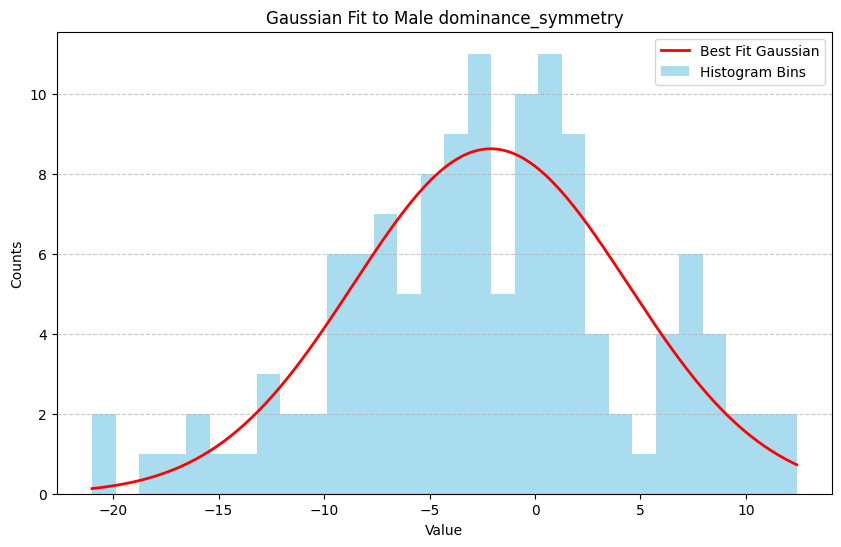

Columns of dataframe inside plotFMAttributes: Index(['subject_id', 'study_id', 'annotator', 'left_original_file_name',
       'left_annotated_mongo_id', 'left_date', 'left_time',
       'right_original_file_name', 'right_annotated_mongo_id', 'right_date',
       ...
       'Complete?.5', 'Right Leg Mean Force, N', 'Right Leg SD Force, N',
       'Left Leg Mean Force, N', 'Left Leg SD Force, N', 'Symmetry, %',
       'Complete?.6', 'dominance_symmetry', 'right_symmetry', 'left_symmetry'],
      dtype='object', length=179)
Best Fit Parameters (Method 1):
  Amplitude = 8.62
  Mean (mu) = 2.30
  Std Dev (sigma) = 6.05


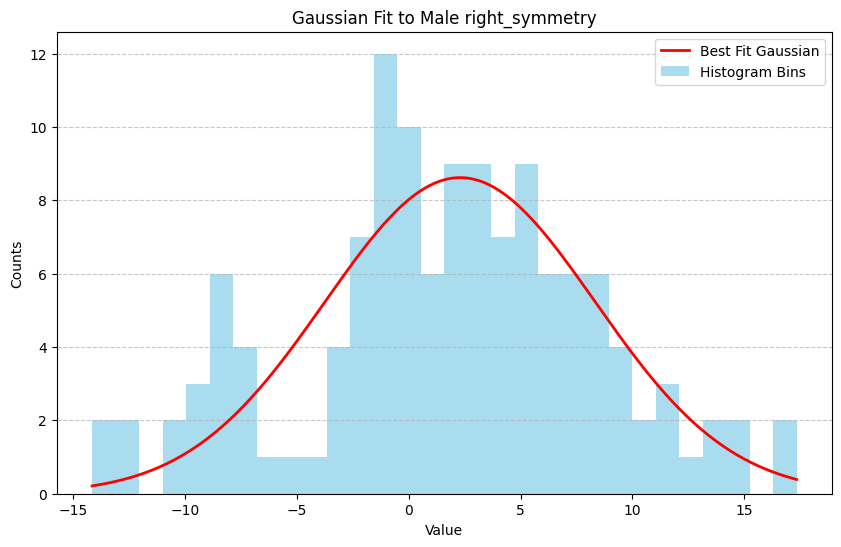

(np.float64(8.620951679958882),
 np.float64(2.297023263365265),
 np.float64(6.047675869981252))

In [ ]:
plotFMAttributes(dataframe_controls_filter, 'dominance_symmetry','Male')
plotFMAttributes(dataframe_controls_filter, 'right_symmetry','Male')

Columns of dataframe inside plotFMAttributes: Index(['subject_id', 'study_id', 'annotator', 'left_original_file_name',
       'left_annotated_mongo_id', 'left_date', 'left_time',
       'right_original_file_name', 'right_annotated_mongo_id', 'right_date',
       ...
       'Complete?.5', 'Right Leg Mean Force, N', 'Right Leg SD Force, N',
       'Left Leg Mean Force, N', 'Left Leg SD Force, N', 'Symmetry, %',
       'Complete?.6', 'dominance_symmetry', 'right_symmetry', 'left_symmetry'],
      dtype='object', length=179)
Best Fit Parameters (Method 1):
  Amplitude = 18.34
  Mean (mu) = -1.65
  Std Dev (sigma) = 6.25


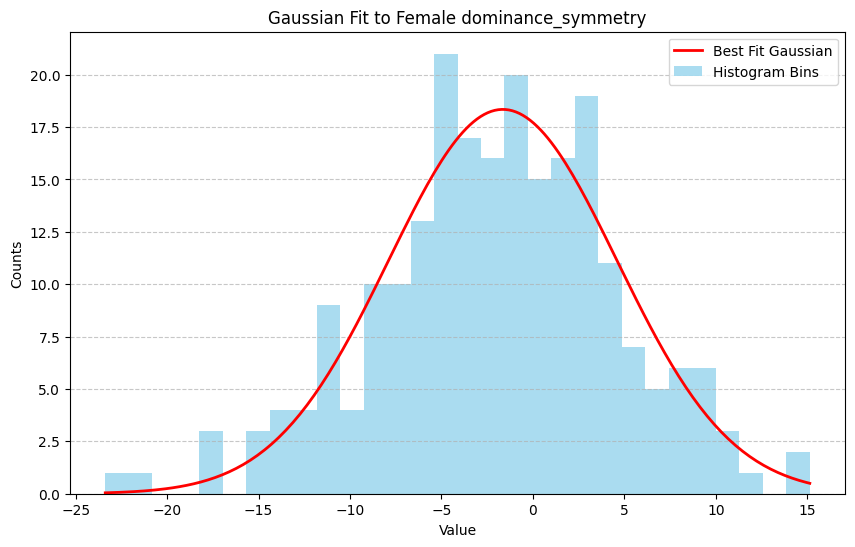

Columns of dataframe inside plotFMAttributes: Index(['subject_id', 'study_id', 'annotator', 'left_original_file_name',
       'left_annotated_mongo_id', 'left_date', 'left_time',
       'right_original_file_name', 'right_annotated_mongo_id', 'right_date',
       ...
       'Complete?.5', 'Right Leg Mean Force, N', 'Right Leg SD Force, N',
       'Left Leg Mean Force, N', 'Left Leg SD Force, N', 'Symmetry, %',
       'Complete?.6', 'dominance_symmetry', 'right_symmetry', 'left_symmetry'],
      dtype='object', length=179)
Best Fit Parameters (Method 1):
  Amplitude = 18.24
  Mean (mu) = 1.95
  Std Dev (sigma) = 5.98


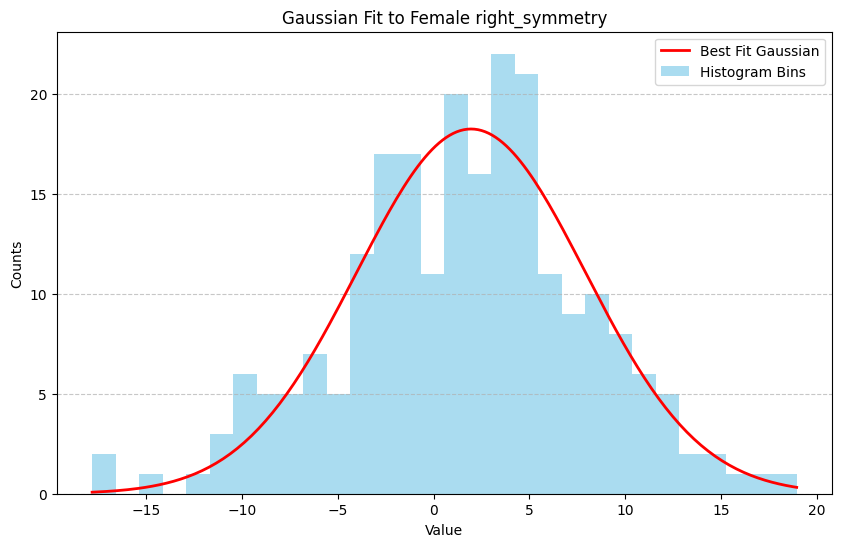

(np.float64(18.236471145924906),
 np.float64(1.9483979653427697),
 np.float64(5.9768947106166))

In [ ]:
plotFMAttributes(dataframe_controls_filter, 'dominance_symmetry','Female')
plotFMAttributes(dataframe_controls_filter, 'right_symmetry','Female')

In [ ]:
#!/usr/bin/env python3
"""
gaussian_utils.py

Small utilities to compute Gaussian PDF, CDF and percentile for a given value.
No external dependencies (uses math.erf).
"""

from math import erf, sqrt, exp, pi

def gaussian_pdf(x: float, mu: float, sigma: float) -> float:
    """Return the Gaussian probability density function value at x."""
    if sigma <= 0:
        raise ValueError("sigma must be positive")
    coeff = 1.0 / (sigma * sqrt(2.0 * pi))
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    return coeff * exp(exponent)

def gaussian_cdf(x: float, mu: float, sigma: float) -> float:
    """Return the Gaussian cumulative distribution function value at x (in [0,1])."""
    if sigma <= 0:
        raise ValueError("sigma must be positive")
    z = (x - mu) / (sigma * sqrt(2.0))
    return 0.5 * (1.0 + erf(z))

def percentile_from_gaussian(f_subject: float, f_mean: float, f_sd: float) -> float:
    """
    Return the percentile (0..100) of f_subject under N(f_mean, f_sd^2).
    Example: returns 50.0 when f_subject == f_mean.
    """
    cdf_value = gaussian_cdf(f_subject, f_mean, f_sd)
    # clamp for numerical safety
    if cdf_value < 0.0:
        cdf_value = 0.0
    elif cdf_value > 1.0:
        cdf_value = 1.0
    return cdf_value * 100.0

# Simple CLI



p = percentile_from_gaussian(4, 1.26, 6)

print(f'person {p}')


person 67.60446733644285


Create program that asks for male/female and then the category and then it will print the plot along with the values for mean, sigmoid, altitude, etc.

In [ ]:
import sys


def classify_x(x: float, fit_sig: float) -> str:
    """Classify x into 'typical', 'borderline', or 'atypical'.
    © 2025 Neuromuscular Dynamics, LLC
    by Francisco Valero-Cuevas

    Uses rules: x is the symmetry score, + favors right side.
      - typical:    abs(x) <= fit_sig (68% of people are within this range)
      - borderline:  fit_sig < abs(x) <= fit_sig*1.5 # fit_sig * 1.5 fit_sig (68-86% of people are within this range)
      - atypical:    abs(x) > fit_sig*1.5 # beyond 1.5 * STD devs ()
    """
    a = abs(x)
    if a <= fit_sig:
        return "typical" # within 68% of people
    elif a <= fit_sig*1.5:
        return "borderline" # between 68-86% of people

    return "atypical" # between 86-99% of people


# (gaussian param to describe distribution) and the function would return label
# x & sigma -> label

# example from below
x = 130
sigma = 6.28
category = classify_x(x, sigma)
print(f"x = {x} is {category}.")



x = 130 is atypical.


/tmp/ipython-input-1812337336.py:74: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gaussian_func, bin_centers, counts, p0=p0)


Best Fit Parameters Male
  Amplitude = 0.00
  Mean (mu) = nan
  Std Dev (sigma) = nan
Subject Count: 0
Best Fit Parameters Female
  Amplitude = 0.00
  Mean (mu) = nan
  Std Dev (sigma) = nan
Subject Count: 0
Best Fit Parameters Both Genders
  Amplitude = 0.00
  Mean (mu) = nan
  Std Dev (sigma) = nan
Subject Count: 0


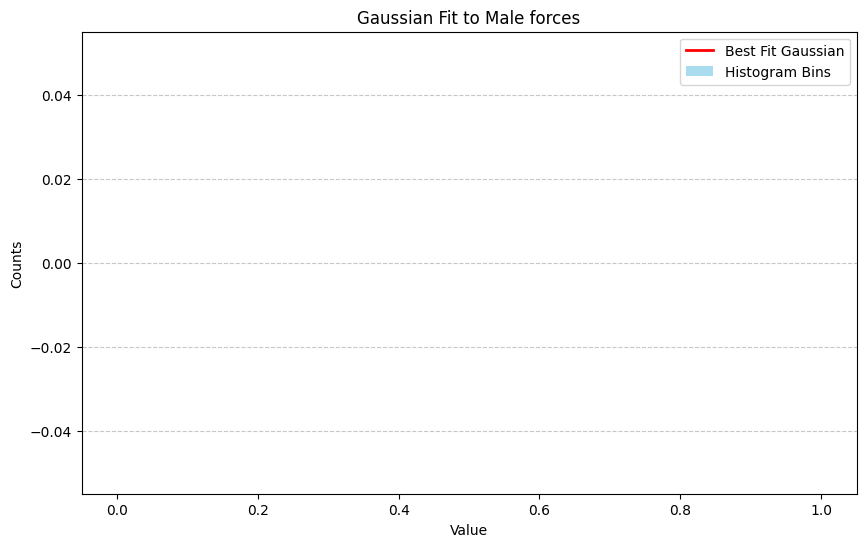

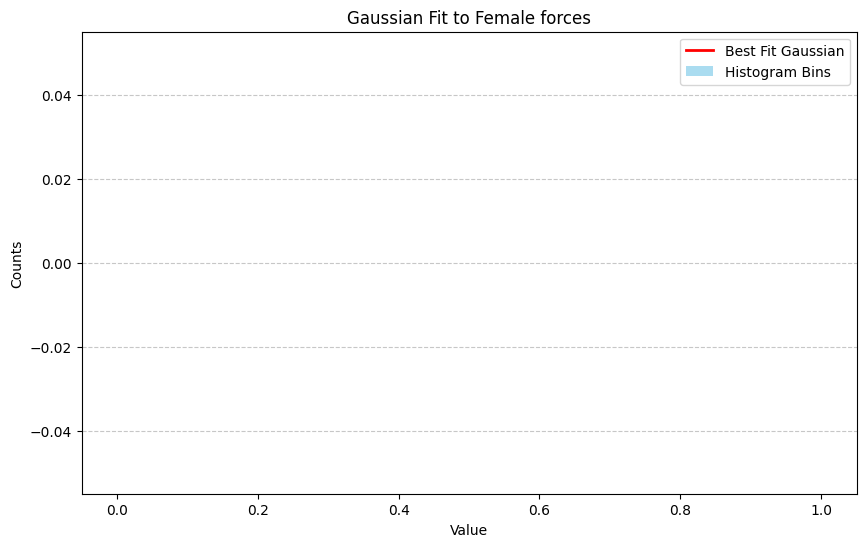

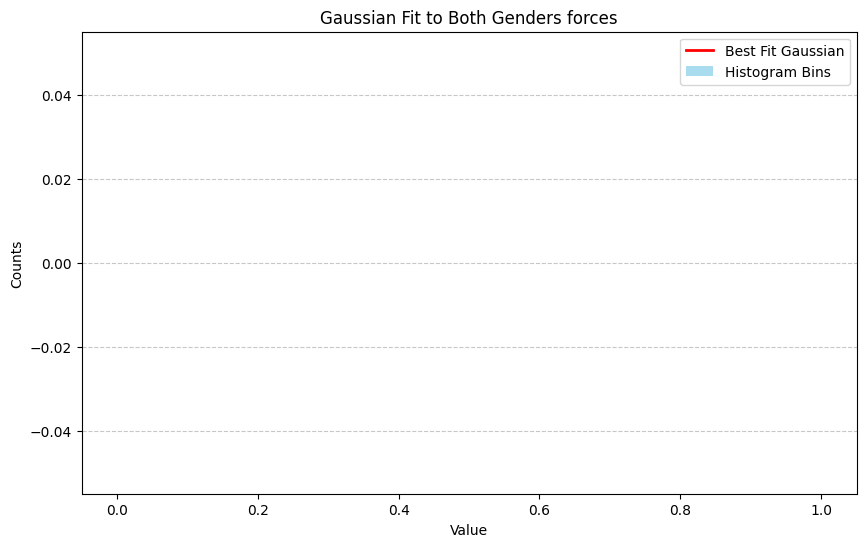

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm


df_controls_male = dataframe_controls_filter[dataframe_controls_filter['Participant Sex'] == 2].copy()

df_controls_female = dataframe_controls_filter[dataframe_controls_filter['Participant Sex'] == 1].copy()

# get the force vectors for both left and right legs -> Female and Male

left_and_right_forces_male = left_and_right_forces_male = np.concatenate([
    df_controls_male['left_force'].values,
    df_controls_male['right_force'].values
])



left_and_right_forces_female = np.concatenate([
    df_controls_female['left_force'].values,
    df_controls_female['right_force'].values
])



# --- 1. Generate Sample Data ---
# Let's create some normally distributed data

def plotAllForces(force_vector, category, sex, bins=30):


  # sanitize the data
  data = force_vector
  # data = (
  #       pd.to_numeric(dataframe[category], errors='coerce')
  #       .replace([np.inf, -np.inf], np.nan)
  #       .dropna()
  #       .values
  # )


  # --- 2. Create the Histogram ---
  # We need the y-values (counts) and the x-values (bin centers)
  counts, bin_edges = np.histogram(data, bins=bins)

  # Calculate the center of each bin for the x-data
  bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0

  # --- 3. Define the Gaussian Function ---
  # This is the function we want to fit.
  def gaussian_func(x, amp, mu, sig):
      return amp * np.exp(- (x - mu)**2 / (2 * sig**2))

  # --- 4. Provide Initial Guesses ---
  # curve_fit works better with good starting points.
  guess_amp = np.max(counts)
  guess_mu = np.mean(data)
  guess_sig = np.std(data)
  p0 = [guess_amp, guess_mu, guess_sig]

  # --- 5. Run the Fit ---
  # Fit 'gaussian_func' to the (bin_centers, counts) data
  popt, pcov = curve_fit(gaussian_func, bin_centers, counts, p0=p0)

  # 'popt' contains the optimal parameters: [amp, mu, sig]
  fit_amp, fit_mu, fit_sig = popt

  print(f"Best Fit Parameters {sex}")
  print(f"  Amplitude = {fit_amp:.2f}")
  print(f"  Mean (mu) = {fit_mu:.2f}")
  print(f"  Std Dev (sigma) = {fit_sig:.2f}")
  print(f'Subject Count: {len(force_vector)}')

  # --- 6. Plot the Results ---
  plt.figure(figsize=(10, 6))

  # Plot the histogram
  bin_width = bin_edges[1] - bin_edges[0]
  plt.bar(bin_centers, counts, width=bin_width, color='skyblue', alpha=0.7, label='Histogram Bins')

  # Plot the fitted curve
  x_fit = np.linspace(bin_edges[0], bin_edges[-1], 200)
  y_fit = gaussian_func(x_fit, *popt)
  plt.plot(x_fit, y_fit, 'r-', linewidth=2, label='Best Fit Gaussian')

  plt.xlabel('Value')
  plt.ylabel('Counts')
  plt.title(f'Gaussian Fit to {sex} {category}')
  plt.legend()
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.savefig('gaussian_fit.png')



# male
plotAllForces(left_and_right_forces_male, 'forces', 'Male')




# # female
plotAllForces(left_and_right_forces_female,'forces', 'Female')


# both sexes
plotAllForces(left_and_right_forces_female,'forces', 'Both Genders')




# Input + Graph Interface

In [ ]:
# have global variables for mu, sigma, altitude

import pathlib

mu, sigma, amplitude = 0, 0, 0

category = input("Column name (e.g., left_force, dominance_symmetry): ").strip()
sex_in = input("Sex (Female/Male or 1/2): ").strip().lower()
bins = input("Bins [default 30]: ").strip()
bins = int(bins) if bins else 30


sex = "Female" if sex_in in ("female","f","1","1.0") else ("Male" if sex_in in ("male","m","2","2.0") else None)
if sex is None:
    raise ValueError("Sex must be Female/Male or 1/2")

df_controlz = dataframe_controls_filter.copy()
amplitude, mu, sigma = plotFMAttributes(df_controlz, category, sex, bins=bins)

x = float(input("X value? ").strip()) # is this value for x axis?
print("PDF:", gaussian_pdf(x, mu, sigma))
print("CDF:", gaussian_cdf(x, mu, sigma))
print("Percentile:", percentile_from_gaussian(x, mu, sigma))
cat = classify_x(x, sigma)
print(f"x = {x} is {cat}.")





KeyboardInterrupt: Interrupted by user

Column name (e.g., left_force): force_symmetry
Sex (Female/Male or 1/2): Male
Bins [default 30]: 30
Best Fit Parameters (Method 1):
  Amplitude = 8.77
  Mean (mu) = 2.22
  Std Dev (sigma) = 6.20
X value? 10
PDF: 0.029292633708001083
CDF: 0.8952472966292647
Percentile: 89.52472966292648
x = 10.0 is atypical.


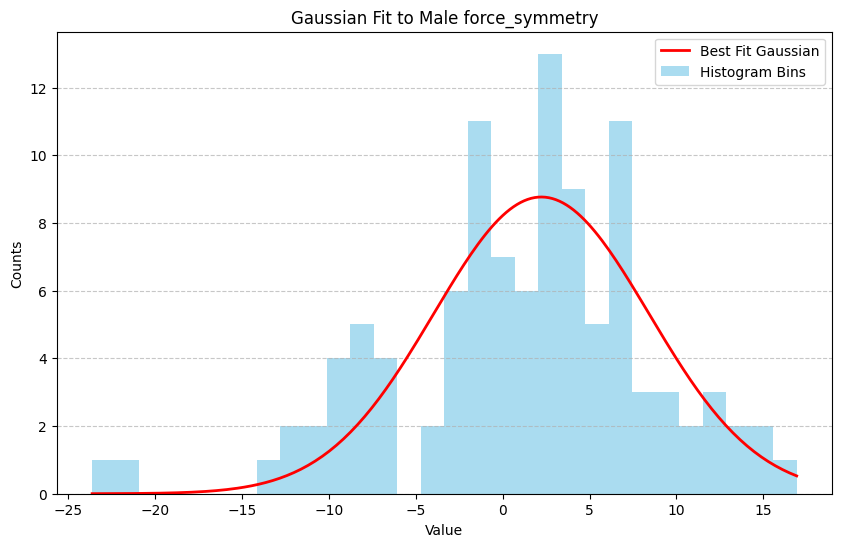

In [ ]:
# have global variables for mu, sigma, altitude

import pathlib

mu, sigma, amplitude = 0, 0, 0

category = input("Column name (e.g., left_force): ").strip()
sex_in = input("Sex (Female/Male or 1/2): ").strip().lower()
bins = input("Bins [default 30]: ").strip()
bins = int(bins) if bins else 30


sex = "Female" if sex_in in ("female","f","1","1.0") else ("Male" if sex_in in ("male","m","2","2.0") else None)
if sex is None:
    raise ValueError("Sex must be Female/Male or 1/2")

df_controls = dataframe_controls_filter.copy()
amplitude, mu, sigma = plotFMAttributes(df_controls, category, sex, bins=bins)

x = float(input("X value? ").strip()) # is this value for x axis?
print("PDF:", gaussian_pdf(x, mu, sigma))
print("CDF:", gaussian_cdf(x, mu, sigma))
print("Percentile:", percentile_from_gaussian(x, mu, sigma))
cat = classify_x(x, sigma)
print(f"x = {x} is {cat}.")





In [ ]:

import pathlib

mu, sigma, amplitude = 0, 0, 0

category = input("Column name (e.g., left_force): ").strip()
sex_in = input("Sex (Female/Male or 1/2): ").strip().lower()
bins = input("Bins [default 30]: ").strip()
bins = int(bins) if bins else 30


sex = "Female" if sex_in in ("female","f","1","1.0") else ("Male" if sex_in in ("male","m","2","2.0") else None)
if sex is None:
    raise ValueError("Sex must be Female/Male or 1/2")

df_controls = dataframe_controls_filter.copy()
amplitude, mu, sigma = plotFMAttributes(df_controls, category, sex, bins=bins)

x = float(input("X value? ").strip()) # is this value for x axis?
print("PDF:", gaussian_pdf(x, mu, sigma))
print("CDF:", gaussian_cdf(x, mu, sigma))
print("Percentile:", percentile_from_gaussian(x, mu, sigma))
cat = classify_x(x, sigma)
print(f"x = {x} is {cat}.")


## Sample Graphs

### Gaussian For Symmetry (both genders)


Best Fit Parameters (Method 1):
  Amplitude = 23.50
  Mean (mu) = 1.35
  Std Dev (sigma) = 6.05
PDF: 0.023759639267133117
CDF: 0.9234208144074232
Percentile: 92.34208144074232


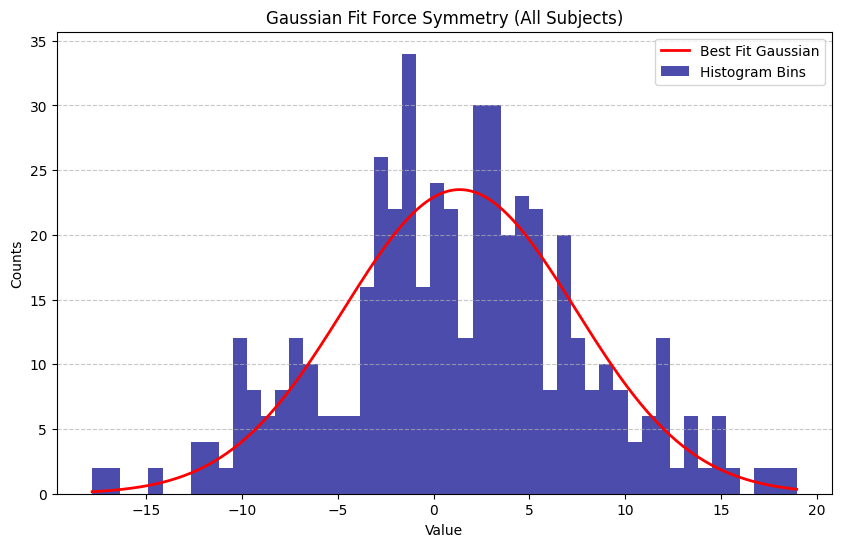

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# --- 1. Generate Sample Data ---
# Let's create some normally distributed data

data = dataframe_controls_filter['force_symmetry']

# --- 2. Create the Histogram ---
# We need the y-values (counts) and the x-values (bin centers)
counts, bin_edges = np.histogram(data, bins=50)

# Calculate the center of each bin for the x-data
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0

# --- 3. Define the Gaussian Function ---
# This is the function we want to fit.
def gaussian_func(x, amp, mu, sig):
    return amp * np.exp(- (x - mu)**2 / (2 * sig**2))

# --- 4. Provide Initial Guesses ---
# curve_fit works better with good starting points.
guess_amp = np.max(counts)
guess_mu = np.mean(data)
guess_sig = np.std(data)
p0 = [guess_amp, guess_mu, guess_sig]

# --- 5. Run the Fit ---
# Fit 'gaussian_func' to the (bin_centers, counts) data
popt, pcov = curve_fit(gaussian_func, bin_centers, counts, p0=p0)

# 'popt' contains the optimal parameters: [amp, mu, sig]
fit_amp, fit_mu, fit_sig = popt

print("Best Fit Parameters (Method 1):")
print(f"  Amplitude = {fit_amp:.2f}")
print(f"  Mean (mu) = {fit_mu:.2f}")
print(f"  Std Dev (sigma) = {fit_sig:.2f}")

# --- 6. Plot the Results ---
plt.figure(figsize=(10, 6))

# Plot the histogram
bin_width = bin_edges[1] - bin_edges[0]
plt.bar(bin_centers, counts, width=bin_width, color='darkblue', alpha=0.7, label='Histogram Bins')

# Plot the fitted curve
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 200)
y_fit = gaussian_func(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r-', linewidth=2, label='Best Fit Gaussian')

plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Gaussian Fit Force Symmetry (All Subjects)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gaussian_fit.png')

x = 10
print("PDF:", gaussian_pdf(x, fit_mu, fit_sig))
print("CDF:", gaussian_cdf(x, fit_mu, fit_sig))
print("Percentile:", percentile_from_gaussian(x, fit_mu, fit_sig))

### Gaussian for force (Men)

Best Fit Parameters (Method 1):
  Amplitude = 7.80
  Mean (mu) = 2.60
  Std Dev (sigma) = 6.28


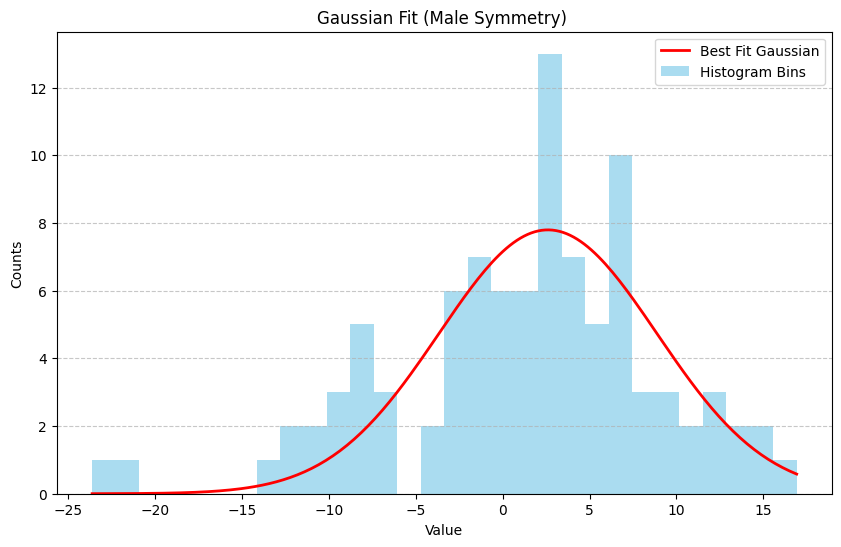

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# --- 1. Generate Sample Data ---
# Let's create some normally distributed data


sex_labels = {1.0: 'Female', 2.0: 'Male'}
# map the participant_sex to Male/Female
df_controls['sex_label'] = df_controls['participant_sex'].map(sex_labels)

df_controls_males = df_controls[df_controls['sex_label'] == 'Male']


df_controls_males_forces = df_controls_males['force_symmetry']



# --- 2. Create the Histogram ---
# We need the y-values (counts) and the x-values (bin centers)
counts, bin_edges = np.histogram(df_controls_males_forces, bins=30)

# Calculate the center of each bin for the x-data
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0

# --- 3. Define the Gaussian Function ---
# This is the function we want to fit.
def gaussian_func(x, amp, mu, sig):
    return amp * np.exp(- (x - mu)**2 / (2 * sig**2))

# --- 4. Provide Initial Guesses ---
# curve_fit works better with good starting points.
guess_amp = np.max(counts)
guess_mu = np.mean(data)
guess_sig = np.std(data)
p0 = [guess_amp, guess_mu, guess_sig]

# --- 5. Run the Fit ---
# Fit 'gaussian_func' to the (bin_centers, counts) data
popt, pcov = curve_fit(gaussian_func, bin_centers, counts, p0=p0)

# 'popt' contains the optimal parameters: [amp, mu, sig]
fit_amp, fit_mu, fit_sig = popt

print("Best Fit Parameters (Method 1):")
print(f"  Amplitude = {fit_amp:.2f}")
print(f"  Mean (mu) = {fit_mu:.2f}")
print(f"  Std Dev (sigma) = {fit_sig:.2f}")

# --- 6. Plot the Results ---
plt.figure(figsize=(10, 6))

# Plot the histogram
bin_width = bin_edges[1] - bin_edges[0]
plt.bar(bin_centers, counts, width=bin_width, color='skyblue', alpha=0.7, label='Histogram Bins')

# Plot the fitted curve
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 200)
y_fit = gaussian_func(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r-', linewidth=2, label='Best Fit Gaussian')

plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Gaussian Fit (Male Symmetry) ')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gaussian_fit.png')

Force histograms and best fit Gaussians for a given sex
Right -> AJ
Left -> AJ


In [ ]:
the issue here arises from what format the data is comming in as

if it is reliably the way it is, then we can do this pretty easily probably



Right vs. left (positive is right) → AJ
Formula: (R-L)/R
Dominant vs. nondominant (positive is dominant) -> AJ
Formula: (D-ND)/D
Noninjured vs. injured (positive is noninjured): -> AJ
formula: (non-injured - injured) / non-injured
